# Week 08 Homework
### 8.1

Last week you practiced single band raster calculations using Sentinel-2 satellite remote sensing data. This week you will practice working with the multiple bands associated with Sentinel-2 data in order to create RGB composites and other band manipulations. 

The Sentinel-2 bands are as follows:

![_._](img/sentinel-2-bands.jpg)

You will compare RGB and NDVI images from May 2018 (```data/pre-woolsey-fire/```) and February 2019 (```data/post-woolsey-fire```) over the Santa Monica Mountains which correspond to pre and post-Woolsey fire. The Woolsey fire occured in November 2018. 

1. Create an **automated workflow** which loads, stacks and cleans the bands of a single Sentinel-2 date. 
2. Run this workflow for both dates: pre and post Woolsey fire.
3. Map the RGB composites for both dates.
4. Calculate the NDVI and map both dates.
5. Write a few sentences of what differences you see between the RGB/NDVI maps. 




In [121]:
#upload packages
import os

import matplotlib.pyplot as plt
import numpy as np
import rioxarray as rxr
import geopandas as gpd
import os
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import xarray as xr
import rioxarray as rxr

In [122]:
# Create the path to your data
pre_w_fire = os.path.join("data","pre-woolsey-fire")

# Generate a list of tif files
pre_fire = glob(os.path.join(pre_w_fire,"*Raw*.tiff"))

# Sort the data to ensure bands are in the correct order
pre_fire.sort()


In [123]:
#clean the bands
def open_clean_bands(band_path):
    """A function that opens a Landsat band as an (rio)xarray object

    Parameters
    ----------
    band_path : list
        A list of paths to the tif files that you wish to combine.
        
    Returns
    -------
    An single xarray object with the Landsat band data.

    """
     
    return rxr.open_rasterio(band_path, masked=True).squeeze()

In [124]:
# Squeeze bands
band_1 = rxr.open_rasterio(pre_fire[0], masked=True).squeeze()
band_1.shape

(337, 625)

In [125]:
allb = [band_1]
for i, aband in enumerate(pre_fire):
    allb.append(open_clean_bands(aband))
  
    allb[i]["band"]=i+1

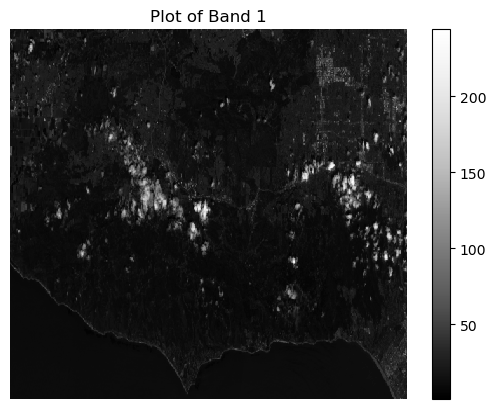

In [126]:
# Plot the data
f, ax=plt.subplots()
band_1.plot.imshow(ax=ax,
                  cmap="Greys_r")
ax.set_axis_off()
ax.set_title("Plot of Band 1")
plt.show()

In [127]:
#stack the bands  
woolsy_pre_xr = xr.concat(allb, dim="band") 
woolsy_pre_xr

<xarray.DataArray (band: 13, y: 337, x: 625)>
array([[[ 13.,  16.,  20., ...,  47.,  43.,  57.],
        [ 16.,  19.,  15., ...,  58.,  36.,  49.],
        [ 20.,  19.,  13., ...,  54.,  30.,  37.],
        ...,
        [ 12.,  12.,  12., ...,  23.,  24.,  27.],
        [ 12.,  11.,  12., ...,  27.,  27.,  26.],
        [ 12.,  12.,  12., ...,  24.,  24.,  27.]],

       [[ 13.,  16.,  20., ...,  47.,  43.,  57.],
        [ 16.,  19.,  15., ...,  58.,  36.,  49.],
        [ 20.,  19.,  13., ...,  54.,  30.,  37.],
        ...,
        [ 12.,  12.,  12., ...,  23.,  24.,  27.],
        [ 12.,  11.,  12., ...,  27.,  27.,  26.],
        [ 12.,  12.,  12., ...,  24.,  24.,  27.]],

       [[ 18.,  20.,  25., ...,  58.,  47.,  63.],
        [ 21.,  24.,  17., ...,  76.,  40.,  53.],
        [ 26.,  24.,  16., ...,  65.,  34.,  35.],
        ...,
...
        ...,
        [  7.,   7.,   7., ...,  51.,  58.,  59.],
        [  7.,   7.,   7., ...,  57.,  59.,  63.],
        [  8.,   7.,   7., ...,  56.,  53.,  52.]],

       [[ 60.,  66.,  98., ...,  80.,  50.,  61.],
        [ 71.,  93.,  55., ...,  74.,  47.,  51.],
        [ 96.,  97.,  45., ...,  66.,  52.,  56.],
        ...,
        [  7.,   7.,   7., ...,  44.,  50.,  47.],
        [  7.,   6.,   7., ...,  51.,  52.,  56.],
        [  7.,   7.,   6., ...,  48.,  45.,  44.]],

       [[ 95.,  89.,  59., ...,  63.,  63.,  84.],
        [ 91.,  62.,  36., ...,  91.,  51.,  65.],
        [ 69.,  61.,  32., ...,  77.,  51.,  69.],
        ...,
        [  8.,   8.,   8., ...,  55.,  62.,  70.],
        [  8.,   7.,   8., ...,  60.,  64.,  63.],
        [  8.,   7.,   7., ...,  63.,  60.,  55.]]], dtype=float32)
Coordinates:
  * band         (band) int64 1 2 3 4 5 6 7 8 9 10 11 12 1
  * x            (x) float64 -119.1 -119.1 -119.1 ... -118.5 -118.5 -118.5
  * y            (y) float64 34.27 34.27 34.27 34.27 ... 34.0 34.0 34.0 34.0
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    scale_factor:            1.0
    add_offset:              0.0

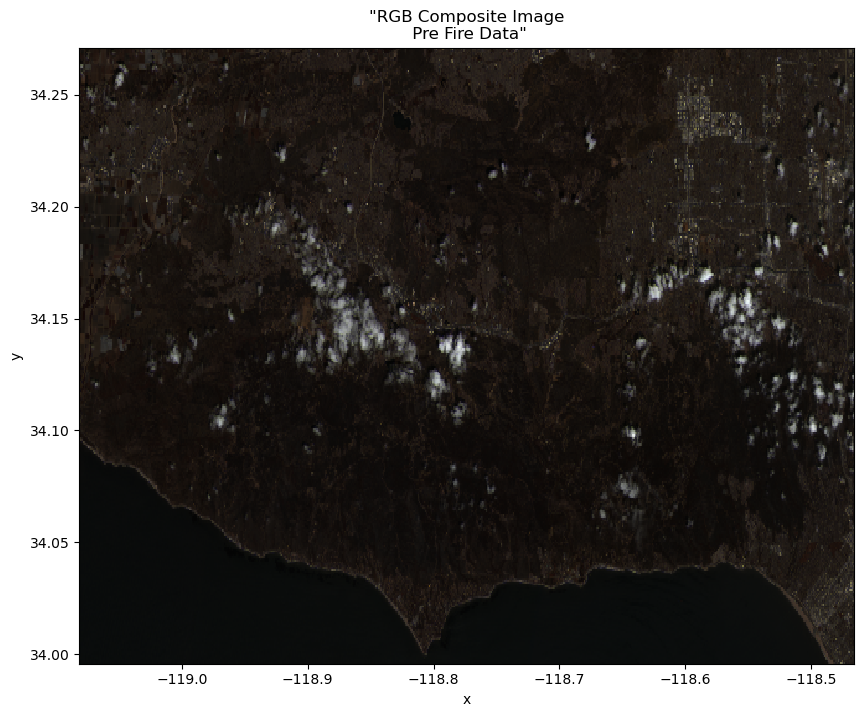

In [128]:
pre_fire_rgb = (woolsy_pre_xr[[3,2,1],:,:])
pre_fire_rgb.astype("int").plot.imshow(rgb="band",figsize=(10, 8))
plt.title('"RGB Composite Image\n Pre Fire Data"')
plt.show()

In [129]:
post_w_fire = os.path.join("data","post-woolsey-fire")
post_fire = glob(os.path.join(post_w_fire,"*Raw*.tiff"))
post_fire.sort()

In [130]:
#clean the bands
def open_clean_bands(band_path):
    """A function that opens a Landsat band as an (rio)xarray object

    Parameters
    ----------
    band_path : list
        A list of paths to the tif files that you wish to combine.
        
    Returns
    -------
    An single xarray object with the Landsat band data.

    """
     
    return rxr.open_rasterio(band_path, masked=True).squeeze()

In [131]:
# Squeeze bands
band_2 = rxr.open_rasterio(post_fire[0], masked=True).squeeze()
band_2.shape

(337, 625)

In [132]:
all_b = [band_2]
for i, aband in enumerate(post_fire):
    all_b.append(open_clean_bands(aband))
  
    all_b[i]["band"]=i+1

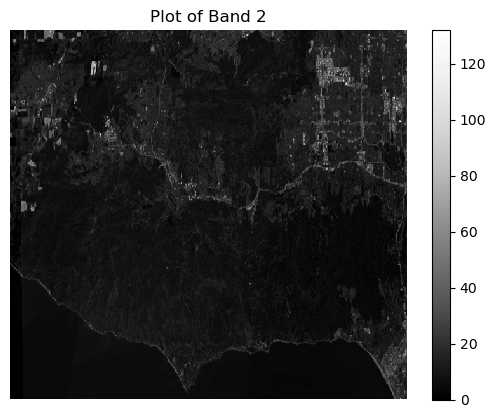

In [133]:
# Plot the data
f, ax=plt.subplots()
band_2.plot.imshow(ax=ax,
                  cmap="Greys_r")
ax.set_axis_off()
ax.set_title("Plot of Band 2")
plt.show()

In [134]:
#stack the bands  
woolsy_post_xr = xr.concat(all_b, dim="band") 
woolsy_post_xr

<xarray.DataArray (band: 13, y: 337, x: 625)>
array([[[ 0.,  2.,  8., ..., 37., 30., 34.],
        [ 3.,  8.,  7., ..., 46., 26., 31.],
        [10.,  8.,  8., ..., 44., 22., 19.],
        ...,
        [ 0.,  0.,  0., ..., 13., 15., 21.],
        [ 0.,  0.,  0., ..., 15., 17., 18.],
        [ 0.,  0.,  0., ..., 16., 15., 17.]],

       [[ 0.,  2.,  8., ..., 37., 30., 34.],
        [ 3.,  8.,  7., ..., 46., 26., 31.],
        [10.,  8.,  8., ..., 44., 22., 19.],
        ...,
        [ 0.,  0.,  0., ..., 13., 15., 21.],
        [ 0.,  0.,  0., ..., 15., 17., 18.],
        [ 0.,  0.,  0., ..., 16., 15., 17.]],

       [[ 4.,  6., 15., ..., 43., 37., 41.],
        [ 6., 14., 14., ..., 61., 33., 44.],
        [18., 14., 13., ..., 54., 28., 26.],
        ...,
...
        ...,
        [ 0.,  0.,  0., ..., 36., 40., 43.],
        [ 0.,  0.,  0., ..., 37., 40., 47.],
        [ 0.,  0.,  0., ..., 42., 35., 36.]],

       [[29., 35., 65., ..., 48., 48., 49.],
        [37., 65., 63., ..., 53., 38., 35.],
        [73., 64., 62., ..., 51., 44., 44.],
        ...,
        [ 0.,  0.,  0., ..., 30., 34., 33.],
        [ 0.,  0.,  0., ..., 32., 34., 41.],
        [ 0.,  0.,  0., ..., 36., 29., 30.]],

       [[69., 68., 61., ..., 47., 46., 53.],
        [68., 59., 63., ..., 72., 42., 45.],
        [62., 61., 63., ..., 67., 41., 46.],
        ...,
        [ 0.,  0.,  0., ..., 42., 46., 52.],
        [ 0.,  0.,  0., ..., 44., 52., 50.],
        [ 0.,  0.,  0., ..., 48., 44., 41.]]], dtype=float32)
Coordinates:
  * band         (band) int64 1 2 3 4 5 6 7 8 9 10 11 12 1
  * x            (x) float64 -119.1 -119.1 -119.1 ... -118.5 -118.5 -118.5
  * y            (y) float64 34.27 34.27 34.27 34.27 ... 34.0 34.0 34.0 34.0
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    scale_factor:            1.0
    add_offset:              0.0

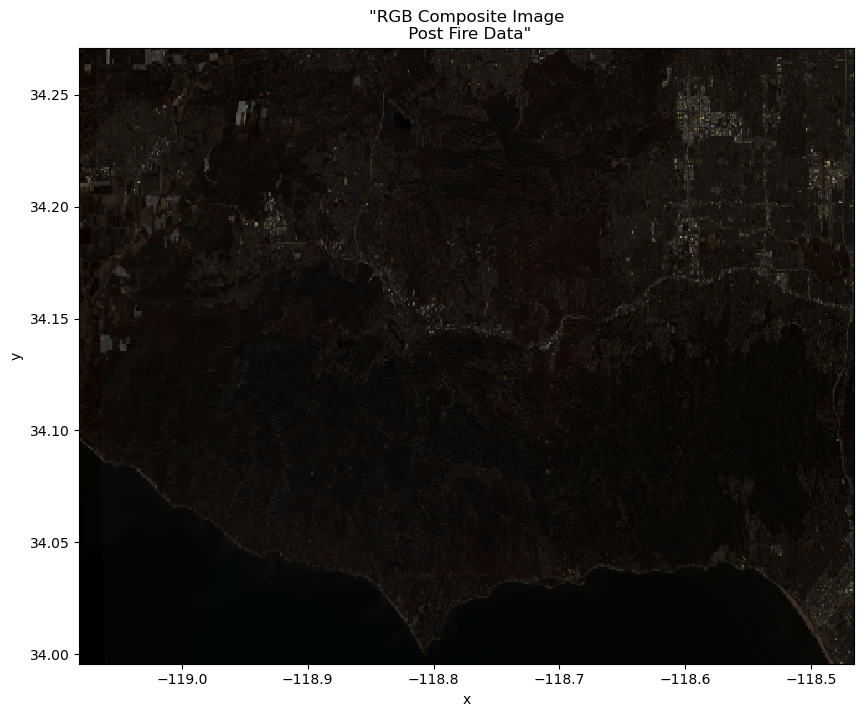

In [135]:
post_fire_rgb = (woolsy_post_xr[[3,2,1],:,:])
post_fire_rgb.astype("int").plot.imshow(rgb="band",figsize=(10, 8))
plt.title('"RGB Composite Image\n Post Fire Data"')
plt.show()

In [144]:
#calculate NDVI
print("Is the spatial extent the same?",
    woolsy_pre_xr.rio.bounds() == woolsy_post_xr.rio.bounds())

print("Is the resolution the same?",
      woolsy_pre_xr.rio.resolution() == woolsy_post_xr.rio.resolution())

Is the spatial extent the same? True
Is the resolution the same? True


In [148]:
#Calculate NDVI Pre
# Allow division by zero
np.seterr(divide='ignore', invalid='ignore')

# Calculate NDVI Pre
pre_fire_red = rxr.open_rasterio(pre_fire[0], masked=True).squeeze()
pre_fire_near = rxr.open_rasterio(pre_fire[7], masked=True).squeeze()
ndvi_pre = (pre_fire_near - pre_fire_red) / (pre_fire_near + pre_fire_red)
ndvi_pre

<xarray.DataArray (y: 337, x: 625)>
array([[ 0.75      ,  0.6893204 ,  0.47368422, ...,  0.15315315,
         0.16504854,  0.19148937],
       [ 0.6923077 ,  0.51898736,  0.4       , ...,  0.22147651,
         0.1627907 ,  0.125     ],
       [ 0.54022986,  0.51282054,  0.42222223, ...,  0.18796992,
         0.25      ,  0.2815534 ],
       ...,
       [-0.2631579 , -0.2       , -0.2631579 , ...,  0.41025642,
         0.44186047,  0.4375    ],
       [-0.2       , -0.15789473, -0.2631579 , ...,  0.37931034,
         0.4065934 ,  0.41573033],
       [-0.2       , -0.2631579 , -0.2631579 , ...,  0.44827586,
         0.42168674,  0.34146342]], dtype=float32)
Coordinates:
    band         int64 1
  * x            (x) float64 -119.1 -119.1 -119.1 ... -118.5 -118.5 -118.5
  * y            (y) float64 34.27 34.27 34.27 34.27 ... 34.0 34.0 34.0 34.0
    spatial_ref  int64 0

In [149]:
#Calculate NDVI Post
# Allow division by zero
np.seterr(divide='ignore', invalid='ignore')

# Calculate NDVI Post
post_fire_red = rxr.open_rasterio(post_fire[0], masked=True).squeeze()
post_fire_infrared = rxr.open_rasterio(post_fire[7], masked=True).squeeze()
ndvi_post = (post_fire_infrared - post_fire_red) / (post_fire_infrared + post_fire_red)
ndvi_post

<xarray.DataArray (y: 337, x: 625)>
array([[1.        , 0.9444444 , 0.7746479 , ..., 0.14942528, 0.23076923,
        0.23595506],
       [0.9166667 , 0.76811594, 0.8055556 , ..., 0.25203252, 0.26760563,
        0.21518987],
       [0.7297297 , 0.7714286 , 0.7777778 , ..., 0.22807017, 0.32307693,
        0.43283582],
       ...,
       [       nan,        nan,        nan, ..., 0.54385966, 0.52380955,
        0.45454547],
       [       nan,        nan,        nan, ..., 0.5081967 , 0.52112675,
        0.49295774],
       [       nan,        nan,        nan, ..., 0.52238804, 0.5081967 ,
        0.43333334]], dtype=float32)
Coordinates:
    band         int64 1
  * x            (x) float64 -119.1 -119.1 -119.1 ... -118.5 -118.5 -118.5
  * y            (y) float64 34.27 34.27 34.27 34.27 ... 34.0 34.0 34.0 34.0
    spatial_ref  int64 0

In [161]:
fig, (ax) = plt.subplots(2, 1, figsize=(10,8))

ndvi_pre.plot.imshow(cmap="RdYlGn",
                     ax=ax)
ax.set_title("NDVI Image/n Pre Fire Data"

#ndvi_post.plot.imshow(cmap="RdYlGn",
                      #ax=ax2)
              
#ax2.set_title("NDVI Image/n Post Fire Data")

plt.suptitle('NDVI Images Pre and Post Fire", fountsize=16)
ax.set_axis_off()
#ax2.set_axis_off()
plt.axis('equal')
plt.show()

SyntaxError: invalid syntax (824779068.py, line 12)